In [1]:
# Title: Predicting tennis match outcome based on player rank points, number of aces, and player country of origin.

In [2]:
# test 10:00 AM 

In [3]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2014.csv', "data/data2014.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2015.csv', "data/data2015.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2016.csv', "data/data2016.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2017.csv', "data/data2017.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2018.csv', "data/data2018.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2019.csv', "data/data2019.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2020.csv', "data/data2020.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2021.csv', "data/data2021.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2022.csv', "data/data2022.csv")
download.file('https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2023.csv', "data/data2023.csv")

In [5]:
data2014<- read_csv("data/data2014.csv")
data2015<- read_csv("data/data2015.csv")
data2016<- read_csv("data/data2016.csv")
data2017<- read_csv("data/data2017.csv")
data2018<- read_csv("data/data2018.csv")
data2019<- read_csv("data/data2019.csv")
data2020<- read_csv("data/data2020.csv")
data2021<- read_csv("data/data2021.csv")
data2022<- read_csv("data/data2022.csv")
data2023<- read_csv("data/data2023.csv")

Rows: 2901 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2943 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tourney_id, tourney_name, surface, tourney_level, winner_entry, wi...
dbl (35): draw_size, tourney_date, match_num, winner_id, winner_seed, winner...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2941 Columns: 49
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): tou

In [6]:
gigadata <- rbind(data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022, data2023) 

#   our chosen categories to determine victory or not will be 
#   winner_ioc and loser_ioc (country of origin) #
#   w_ace and l_ace (number of aces the winner/loser got)   #
#   winner_rank_points and loser_rank_points   #

selected_gigadata<- select(gigadata, w_ace, l_ace, winner_rank_points, loser_rank_points, loser_rank, winner_rank)
selected_gigadata


#However, our datset actually isn't tidy because the categorical factor of "win" or "loss" is integrated into every column. We first must combine the columns and extract the "win" or "loss" factor into a new column. 


w_ace,l_ace,winner_rank_points,loser_rank_points,loser_rank,winner_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,9,1090,425,136,39
11,14,774,1160,35,61
18,4,960,1244,29,46
23,5,307,549,100,172
15,13,918,697,70,50
10,4,1175,784,59,34
13,4,1310,721,67,28
4,8,780,41,628,60
31,4,369,310,170,147


In [7]:
new_data <- data.frame(status = character(), ace = numeric(), rank_points = numeric(), rank = numeric())
for(i in 1:nrow(selected_gigadata)) {
    row <- selected_gigadata[i,]
    new_data[nrow(new_data) + 1,] = c("Win", pull(row["w_ace"]), pull(row["winner_rank_points"]), pull(row["winner_rank"]))
    new_data[nrow(new_data) + 1,] = c("Loss", pull(row["l_ace"]), pull(row["loser_rank_points"]), pull(row["loser_rank"]))
} 





First we need to split our data into training and testing sets. This shuffles the data so that no ordering influences the data and stratifies the data by the status label so that the is the same proportion of the status label in the training and testing set. 

In [8]:
tennis_split <- initial_split(new_data, prop = 0.75, strata = status)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split) 

In [9]:
head(tennis_train)
nrow(tennis_train)

,status,ace,rank_points,rank
,<chr>,<chr>,<chr>,<chr>
4,Loss,14,1160,35
6,Loss,4,1244,29
8,Loss,5,549,100
10,Loss,13,697,70
12,Loss,4,784,59
14,Loss,4,721,67


[1] 40320

In [10]:
rank_points_double<- mutate(tennis_train, rank_points= as.numeric(rank_points))
double_graph<- mutate(rank_points_double, rank= as.numeric(rank))
double_graph

,status,ace,rank_points,rank
,<chr>,<chr>,<dbl>,<dbl>
4,Loss,14,1160,35
6,Loss,4,1244,29
8,Loss,5,549,100
10,Loss,13,697,70
12,Loss,4,784,59
14,Loss,4,721,67
16,Loss,8,41,628
18,Loss,4,310,170
22,Loss,8,965,45


win_or_lose,average_aces
<chr>,<dbl>
loser_ace,5.444466
winner_ace,7.284860


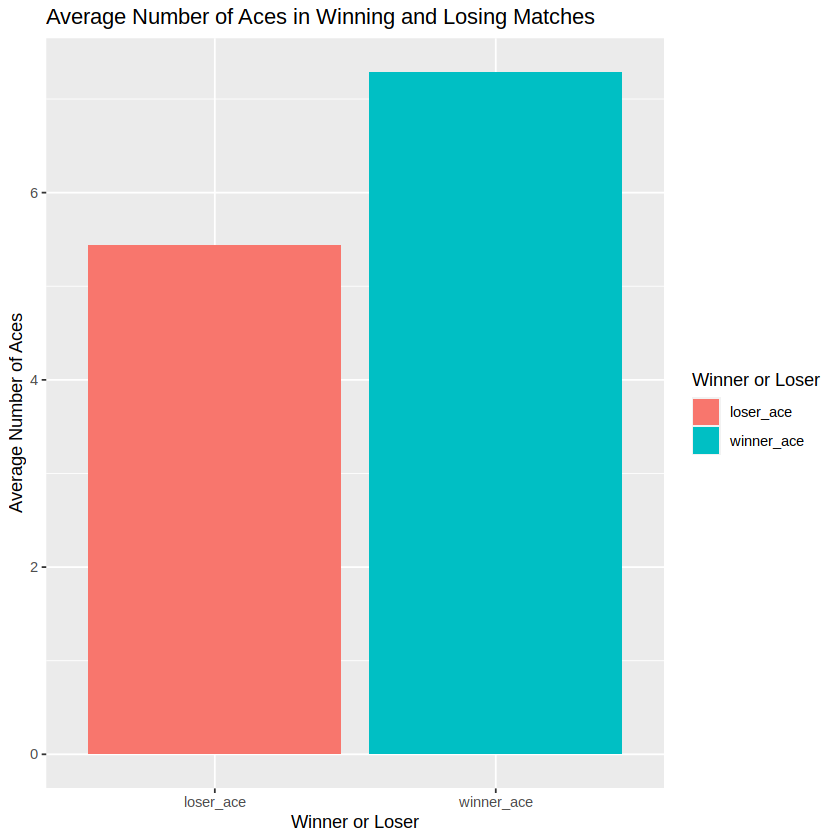

In [11]:
winner_ace_tbl<- summarize(gigadata, "winner_ace" = mean(w_ace, na.rm= TRUE))

loser_ace_tbl<- summarize(gigadata, "loser_ace" = mean(l_ace, na.rm= TRUE))


ace_tbl<- merge(loser_ace_tbl, winner_ace_tbl) |>
    pivot_longer(cols = loser_ace:winner_ace,
                names_to= "win_or_lose", 
                values_to = "average_aces")

ace_tbl

ace_bar<- ggplot(ace_tbl, aes(x= win_or_lose, y = average_aces, fill=win_or_lose)) + 
    geom_bar(stat="identity") +
    labs(x = "Winner or Loser", y = "Average Number of Aces", fill = "Winner or Loser") +
    ggtitle("Average Number of Aces in Winning and Losing Matches")

ace_bar

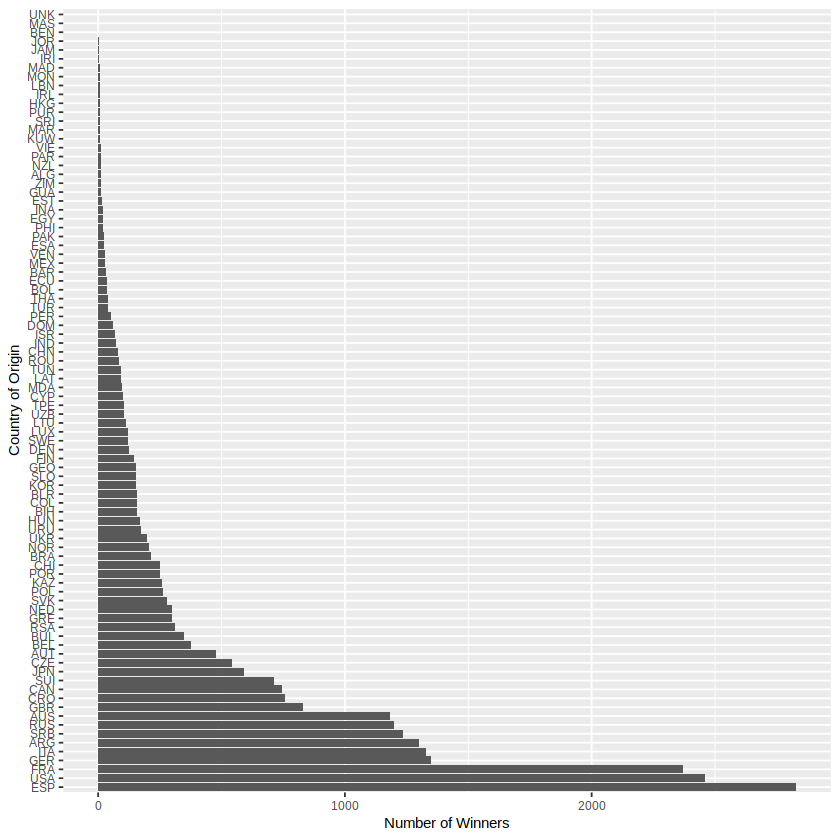

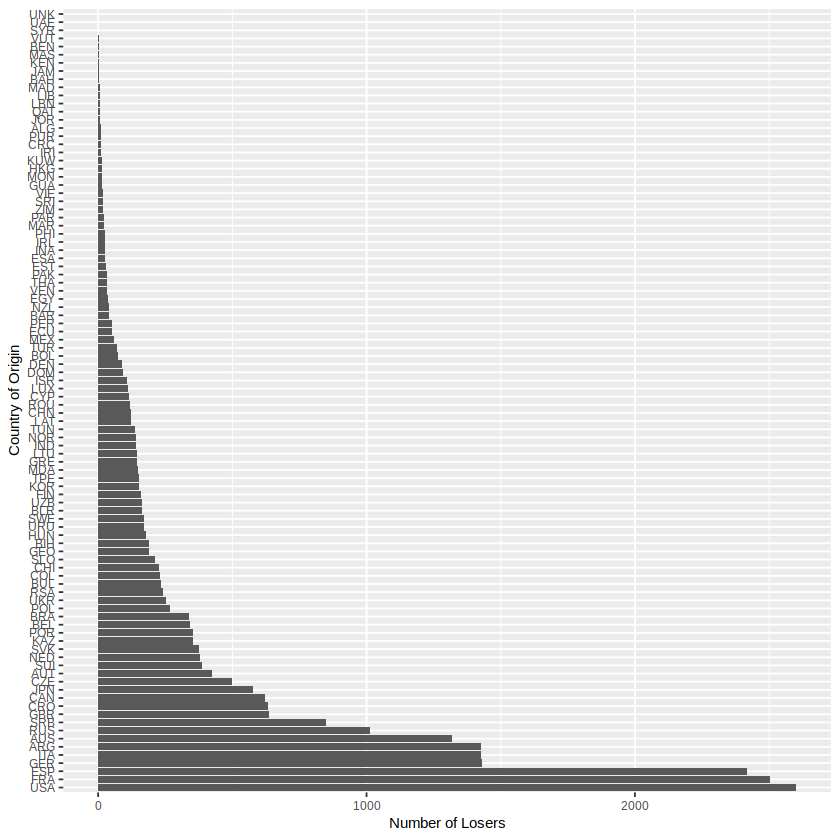

In [12]:
country_data<- select(gigadata, winner_ioc, loser_ioc)
country_winners<- country_data |>
    group_by(winner_ioc) |>
    summarize(counts=n()) |>
        ggplot(aes( y=fct_reorder(winner_ioc, counts, .desc=TRUE), x = counts)) + 
        geom_bar(stat="identity") +
        labs(x = "Number of Winners", y = "Country of Origin") + 
        theme(text = element_text(size = 9))

country_winners

country_losers<- country_data |>
    group_by(loser_ioc) |>
    summarize(counts=n()) |>
        ggplot(aes( y=fct_reorder(loser_ioc, counts, .desc=TRUE), x = counts)) + 
        geom_bar(stat="identity") +
        labs(x = "Number of Losers", y = "Country of Origin") + 
        theme(text = element_text(size = 9))

country_losers

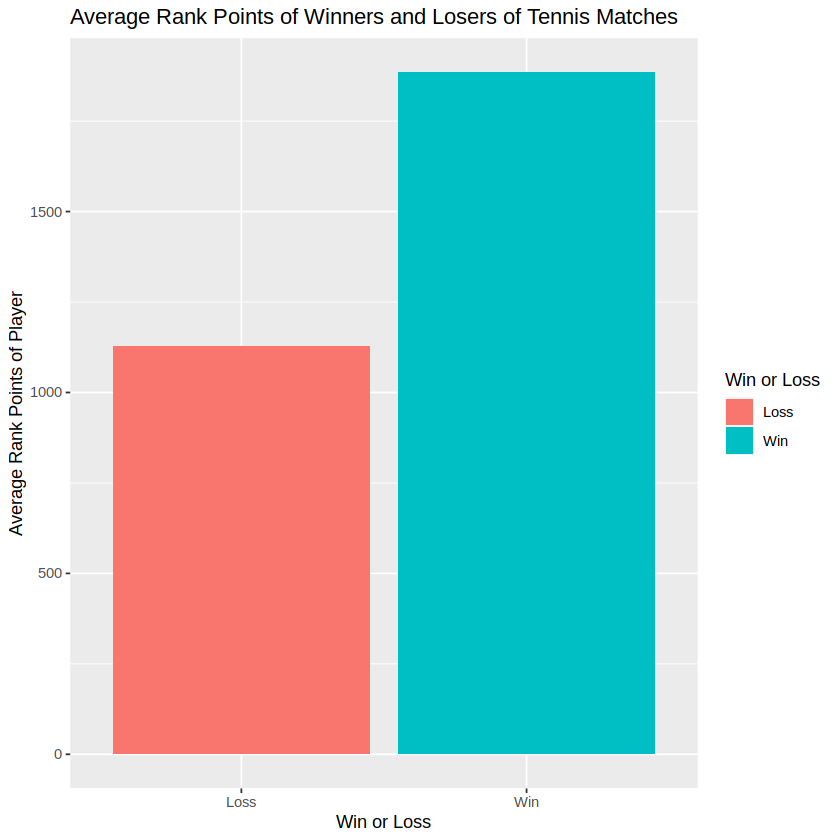

In [13]:
ranking_points_data <- double_graph|>
    group_by(status) |>
    summarize( average_rank_points = mean(rank_points, na.rm = TRUE))

ranking_points_data |> 

ggplot(aes(x=status, y =average_rank_points, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank Points of Player", fill = "Win or Loss") + 
    ggtitle("Average Rank Points of Winners and Losers of Tennis Matches")

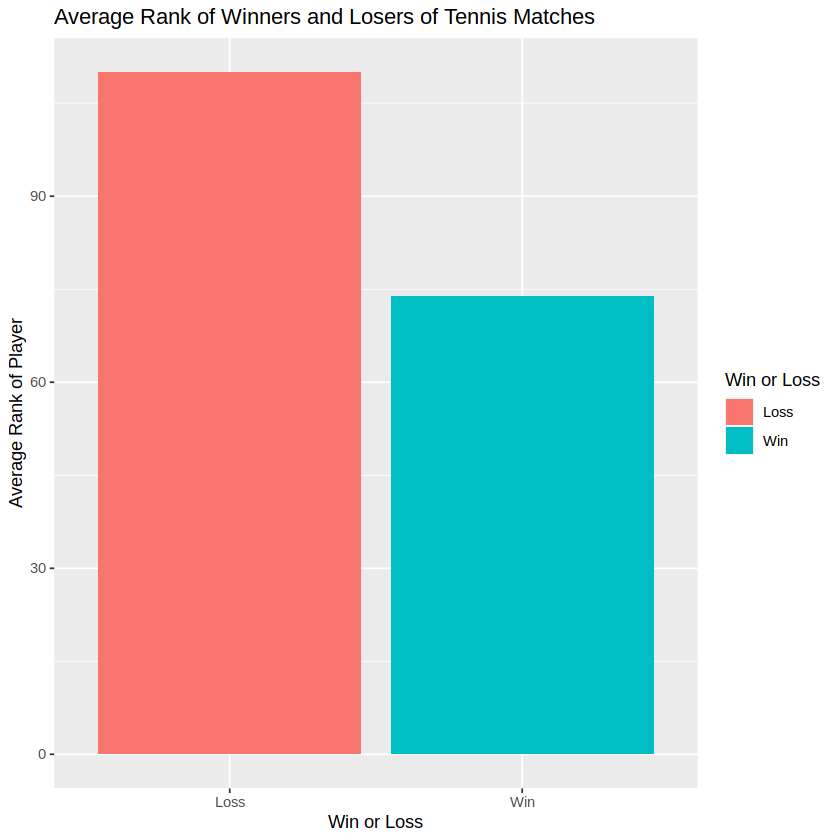

In [14]:
ranking_data <- double_graph|>
    group_by(status) |>
    summarize(average_rank = mean(rank, na.rm = TRUE))

ranking_data |> 
ggplot(aes(x=status, y =average_rank, fill = status)) + 
    geom_bar(stat="identity") + 
    labs(x = "Win or Loss", y = "Average Rank of Player", fill = "Win or Loss") + 
    ggtitle("Average Rank of Winners and Losers of Tennis Matches")